<a href="https://colab.research.google.com/github/anomaitech/gwdm_south_america/blob/main/GWDM_South_America.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import geopandas as gpd

In [64]:
#aquifers
aquifers=gpd.read_file("/content/Rio_Cobre_Hydrologic_Basin.shp")

In [67]:
aquifers
aquifers.to_crs(epsg=4326, inplace=True)

                     geometry
0   POINT (-76.79918 18.2622)
1  POINT (-76.56857 17.87585)
2    POINT (-76.2595 17.9557)
3  POINT (-77.04766 17.95351)
4  POINT (-77.26401 17.81278)


<Axes: >

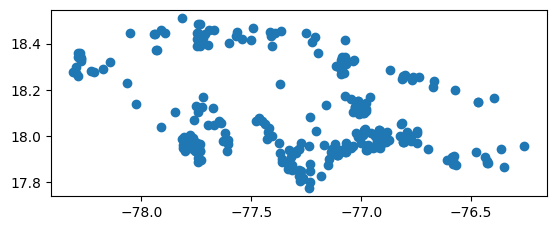

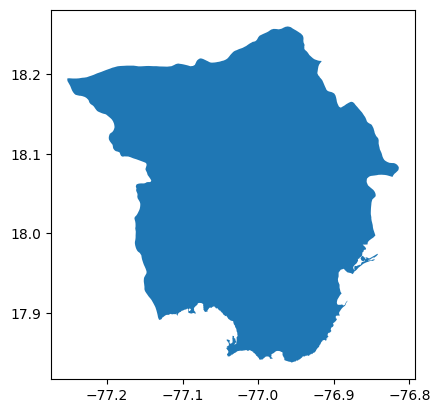

In [68]:
# prompt: import shapefile file using geopandas




# Load the shapefile
gdf = gpd.read_file("/content/Monitoring_Wells.shp")
gdf.to_crs(epsg=4326, inplace=True)

# Display the first few rows of the GeoDataFrame
print(gdf.head())

# Plot the shapefile (optional)
gdf.plot()
aquifers.plot()

In [84]:
aquifers['aquifer_name']='aquifer'
aquifers['aquifer_id']=1

In [85]:
# prompt: save aquifer and gdf as a shapefile

aquifers.to_file("aquifers_jamaica.shp", driver='ESRI Shapefile')


<ipython-input-85-e86caaa27ec8>:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  aquifers.to_file("aquifers_jamaica.shp", driver='ESRI Shapefile')
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'aquifer_name' to 'aquifer_na'
  ogr_write(


In [86]:
aquifers

,geometry,aquifer_name,aquifer_id
0,"POLYGON ((-76.87346 17.95089, -76.87357 17.950...",aquifer,1


In [52]:
import pandas as pd
wells=pd.read_excel("/content/Rio_Cobre_Basin_Groundwater_Levels.xls")

In [53]:
unique_wells=wells["Well"].unique()

In [70]:
# prompt: create Aquifer_id column from Aquifer

wells['Aquifer_id'] = wells['Aquifer'].astype('category').cat.codes
wells['Aquifer_id']=1

In [71]:
wells['Aquifer_id'].unique()

array([1])

In [61]:
wells['Aquifer'].unique()

array(['Alluvium', 'Limestone', 'Alluvium/Limestone',
       'Current Monitor Well'], dtype=object)

In [55]:


unique_well_coords = wells[["Well","Aquifer", "Longitude", "Latitude"]].drop_duplicates()

In [56]:
unique_well_coords=unique_well_coords.reset_index(drop=True)

In [50]:
unique_well_coords.to_csv("unique_well_coords_jamaica.csv", index=False)




In [75]:
unique_well_coords

,Well,Aquifer,Longitude,Latitude
0,Amity Hall 1 (North),Alluvium,-77.047656,17.953512
1,Amity Hall 2 (South),Alluvium,-77.047953,17.939473
2,Amity Hall CH 1,Alluvium,-77.047500,17.946900
3,AR EB 4-1,Alluvium,-76.929700,17.971800
4,AR EB 5-2,Alluvium,-76.926313,17.961835
...,...,...,...,...
161,White Marl 1,Limestone,-76.907800,18.002300
162,Windsor Park,Alluvium,-76.986200,17.971400
163,Woodland 1,Alluvium,-76.949579,17.981492
164,Woodland Dug,Alluvium,-76.946900,17.979100


In [77]:


unique_well_coords['well_id'] = unique_well_coords.index + 1

In [73]:
wells.drop(columns=["Aquifer"], inplace=True)

In [89]:
wells.to_csv("wells_measurement_jamaica.csv", index=False)

In [87]:
# prompt: remove null values if there is a null value or -9999 in Gwl_masl

wells['Gwl_masl'] = wells['Gwl_masl'].replace(-9999, pd.NA)
wells.dropna(subset=['Gwl_masl'], inplace=True)

In [92]:
wells.to_csv("wells_measurement_jamaica.csv", index=False)

In [79]:
# prompt: merge  unique_well_coords['well_id']  in wells based on well column

wells = wells.merge(unique_well_coords[['well_id', 'Well']], left_on='Well', right_on='Well', how='left')


In [94]:
wells.drop(columns=["Monitor Status","Gwl_mbgl"], inplace=True)

In [96]:
wells['Gwl_masl'].astype(float)

,Gwl_masl
0,7.90
1,7.97
2,7.63
3,6.78
4,6.02
...,...
37997,3.58
37998,3.54
37999,3.58
38000,3.60


In [97]:
wells.to_csv("wells_measurement_jamaica.csv", index=False)

     CODPUNTOAG               NOMBRE   ACUIFERO    Latitud   Longitud  \
0  0814-E-PP003  CE cantón Tecualuya  ESA-07-01  13.468475 -89.096577   
1  0201-A-PP002             PROCAVIA  ESA-03-07  13.970333 -89.570583   
2  0201-A-PP001        Sihuatehuacán  ESA-03-07  13.991861 -89.543520   
3  1116-G-PP001    CE Los Eucaliptos  ESA-12-03  13.394389 -88.650583   
4  0502-A-PP001        UCA-Monitoreo  ESA-06-12  13.681813 -89.233830   

   Aquifer_ID_left                    geometry  index_right iso3  \
0                1  POINT (-89.09658 13.46848)            0  SLV   
1                1  POINT (-89.57058 13.97033)            0  SLV   
2                1  POINT (-89.54352 13.99186)            0  SLV   
3                1  POINT (-88.65058 13.39439)            0  SLV   
4                1  POINT (-89.23383 13.68181)            0  SLV   

         status color_code         name continent           region iso_3166_1  \
0  Member State        SLV  El Salvador  Americas  Central America     

<ipython-input-20-abdcf1a242a7>:34: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_data = gpd.sjoin(wells_gdf, gdf, how="inner", predicate="within") # Changed 'op' to 'predicate'


<Axes: >

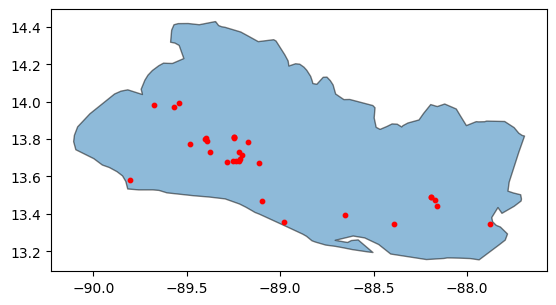

In [ ]:
# prompt: Error: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

import geopandas as gpd
import pandas as pd

# Load the shapefile
gdf = gpd.read_file("/content/modified_elsalvador.shp")

# Load the wells data
wells = pd.read_csv("/content/Pozos de monitoreo.csv")

# Convert wells DataFrame to a GeoDataFrame
# Assuming 'Longitude' and 'Latitude' columns exist in wells
wells_gdf = gpd.GeoDataFrame(
    wells, geometry=gpd.points_from_xy(wells.Longitud, wells.Latitud)
)

# Ensure both GeoDataFrames have the same Coordinate Reference System (CRS)
if gdf.crs is None and wells_gdf.crs is not None:
    # If gdf has no CRS but wells_gdf does, assign the wells CRS to gdf
    gdf.set_crs(wells_gdf.crs, allow_override=True)
elif wells_gdf.crs is None and gdf.crs is not None:
    # If wells_gdf has no CRS but gdf does, assign the gdf CRS to wells_gdf
    wells_gdf.set_crs(gdf.crs, allow_override=True)
elif gdf.crs is not None and wells_gdf.crs is not None and gdf.crs != wells_gdf.crs:
    # If both have CRS but they are different, reproject wells_gdf to match gdf's CRS
    wells_gdf = wells_gdf.to_crs(gdf.crs)

# Perform the spatial join
# Use 'within' to find wells that are within the polygons of gdf
# Set 'predicate' to 'within' and 'how' to 'inner'
# You can choose 'inner', 'left', or 'right' depending on your needs
# 'inner' keeps only the geometries that intersect
joined_data = gpd.sjoin(wells_gdf, gdf, how="inner", predicate="within") # Changed 'op' to 'predicate'

# Display the first few rows of the joined data
print(joined_data.head())

# Plot the joined data (optional)
# Ensure you have a column to color the points if needed, e.g., based on the region they fall into
# For a simple plot, just plot the resulting points on top of the polygons
ax = gdf.plot(alpha=0.5, edgecolor='k') # Plot the regions first
joined_data.plot(ax=ax, color='red', markersize=10) # Plot the wells that are within regions

In [ ]:
joined_data.to_csv("joined_data.csv", index=False)